In [1]:
import os
import random

import numpy as np

from rfft.hypothesis import Hypothesis
from rfft.multilayer_perceptron import MultilayerPerceptron

from decoy_mnist import generate_dataset
from decoy_mnist import load_annotations
from decoy_mnist import load_hypothesis

In [2]:
Xr, X, y, E, Xtr, Xt, yt, Et = generate_dataset()

In [3]:
dirname = 'tagging/decoy_mnist'

In [4]:
def score_model(mlp):
    print('Train: {0}, Test: {1}'.format(mlp.score(X, y), mlp.score(Xt, yt)))
    return (mlp.score(X, y), mlp.score(Xt, yt))

In [7]:
def run_experiment():
    INCREMENT = 3
    WEIGHT_PER_MASK = 166
    
    xml_files = [os.path.join(dirname, x) for x in os.listdir(dirname) if x.endswith('.xml')]
    random.shuffle(xml_files)
    
    accuracies = []

    iteration = 0
    for indices, hypothesis in Hypothesis.incrementally_sample(xml_files,
                                                               load_hypothesis,
                                                               X.shape,
                                                               increment=INCREMENT):
        non_zero_rows = np.where(hypothesis.A != 0)[0]
        assert set(non_zero_rows) == set(indices)
        assert(len(indices) == iteration * INCREMENT)
        
        hypothesis.weight = WEIGHT_PER_MASK * len(indices)
        mlp = MultilayerPerceptron()
        mlp.fit(X, y, hypothesis=hypothesis, num_epochs=6, always_include=indices, show_progress_every=500, verbose=True)

        train_acc, test_acc = score_model(mlp)
        accuracies.append((len(indices), train_acc, test_acc))
        iteration += 1
    return accuracies

In [8]:
all_accuracies = []

In [9]:
for i in range(1):
    all_accuracies.append(run_experiment())

Iteration=1000, crossentropy=51.75997889381819, rightreasons=0.0, smallparams=0.037090424102738856, lenX=1.0Train: 0.96115, Test: 0.6726
Iteration=1000, crossentropy=86.32726791876905, rightreasons=3.859267184907163, smallparams=0.03576816893838333, lenX=1.0Train: 0.9300166666666667, Test: 0.7213
Iteration=1000, crossentropy=237.98723021263524, rightreasons=90.65750107097197, smallparams=0.03533451183553031, lenX=1.0Train: 0.8946666666666667, Test: 0.7356
Iteration=1000, crossentropy=228.2144126076356, rightreasons=102.03542137397845, smallparams=0.03504720514995973, lenX=1.0Train: 0.8409666666666666, Test: 0.7133
Iteration=1000, crossentropy=350.0680824993992, rightreasons=183.39926065988192, smallparams=0.03425220333802369, lenX=1.0Train: 0.8077166666666666, Test: 0.6986
Iteration=1000, crossentropy=484.83024230756905, rightreasons=182.4197697472366, smallparams=0.03416057637449, lenX=1.01.0Train: 0.7358333333333333, Test: 0.6582
Iteration=1000, crossentropy=815.4432449825305, rightr

In [10]:
import numpy as np
import matplotlib.pyplot as plt

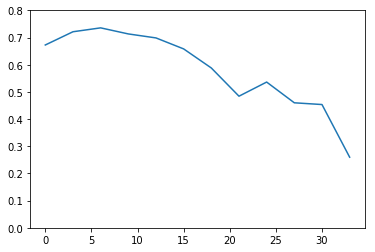

In [25]:
accuracies = np.array(list(map(list, all_accuracies[0])))

plt.plot(accuracies[:-2, 0], accuracies[:-2, 2])
plt.ylim((0, 0.8))
plt.show()